# Analysing Github User Interactions

In [1]:
from github import Github

#put your token 
ACCESS_TOKEN = "#"


client = Github(ACCESS_TOKEN, per_page=100)

# 1. Repository Specific Analysis


In [2]:
USER = 'ahmadawais'
REPO = 'hacktoberfest'

user = client.get_user(USER)
repo = user.get_repo(REPO)

# Visualising Stargazer Network

Number of stargazers 91


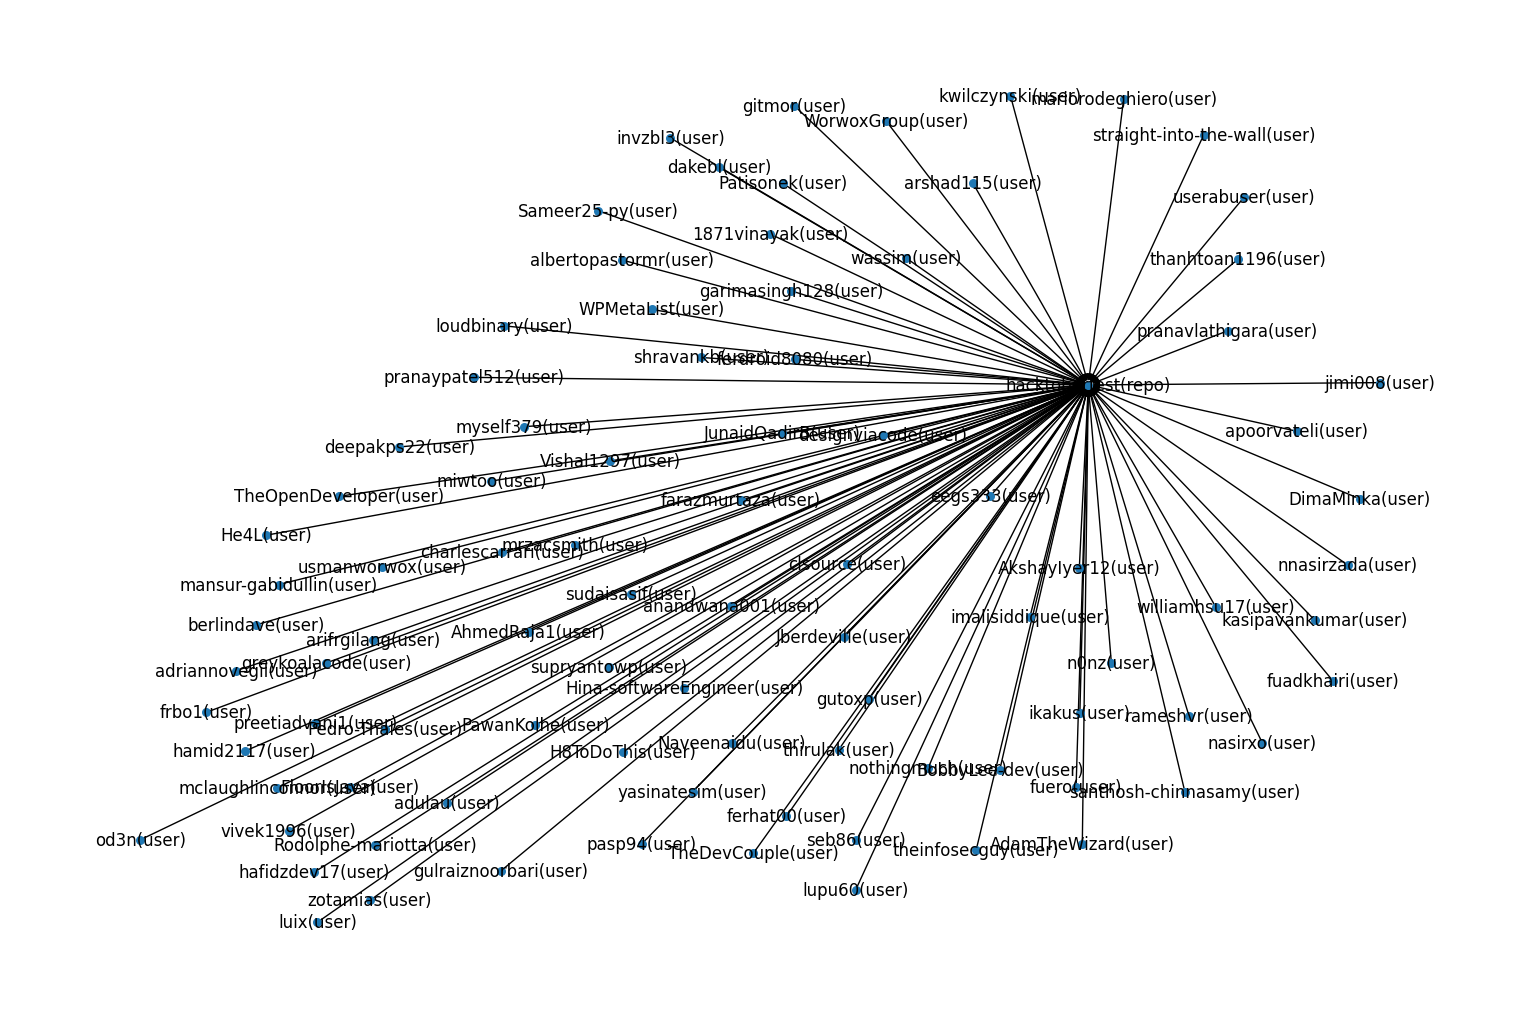

In [3]:
import networkx as nx

g_stargazers = nx.DiGraph()

g_stargazers.add_node(repo.name + '(repo)', type='repo', lang=repo.language, owner=user.login)

stargazers = [ s for s in repo.get_stargazers() ]
print ("Number of stargazers", len(stargazers))
for sg in stargazers:
    g_stargazers.add_node(sg.login + '(user)', type='user')
    g_stargazers.add_edge(sg.login + '(user)', repo.name + '(repo)', type='gazes')

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(g_stargazers, with_labels=True, node_size=30)
plt.show()

# Visualising Forks Network

Number of forks 140


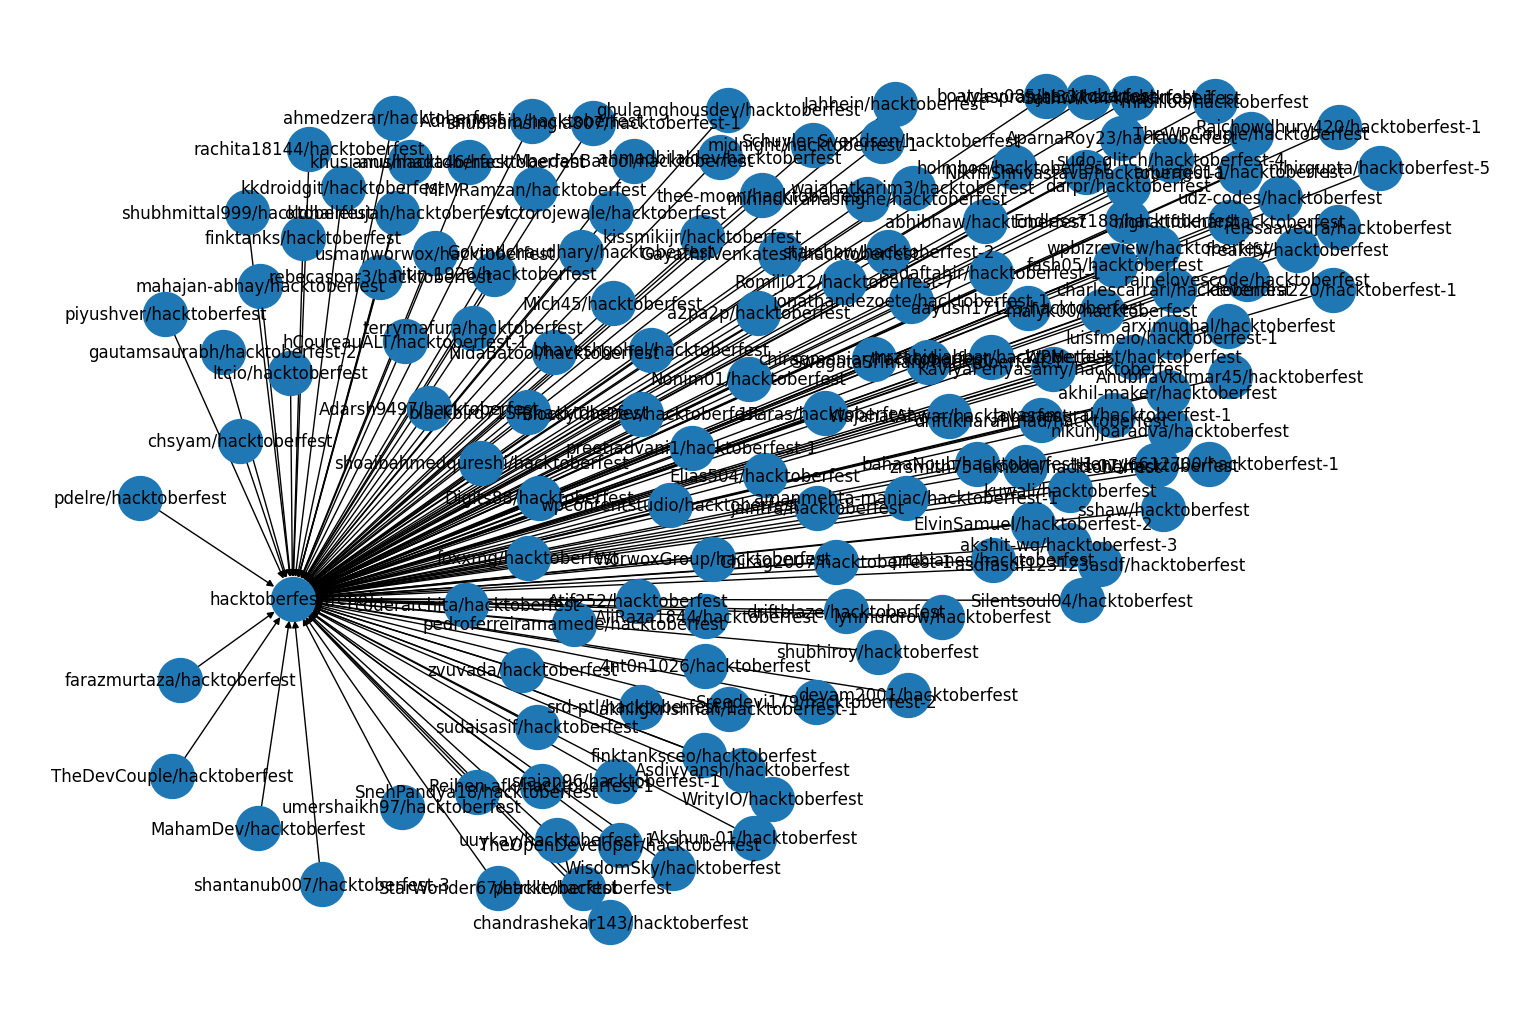

In [4]:
import networkx as nx

g_forks = nx.DiGraph()

g_forks.add_node(repo.name + '(repo)', type='repo', lang=repo.language, owner=user.login)

forks = [ s for s in repo.get_forks() ]
print ("Number of forks", len(forks))
for fork in forks:
    g_forks.add_node(fork.full_name , type='user')
    g_forks.add_edge(fork.full_name, repo.name + '(repo)', type='forks')

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(g_forks, with_labels=True, node_size=1000)
plt.show()

# 2. User Specific Analysis

In [5]:
USER = 'prashant-smart'

user = client.get_user(USER)

# Creating Follower Network

Number of followers 5


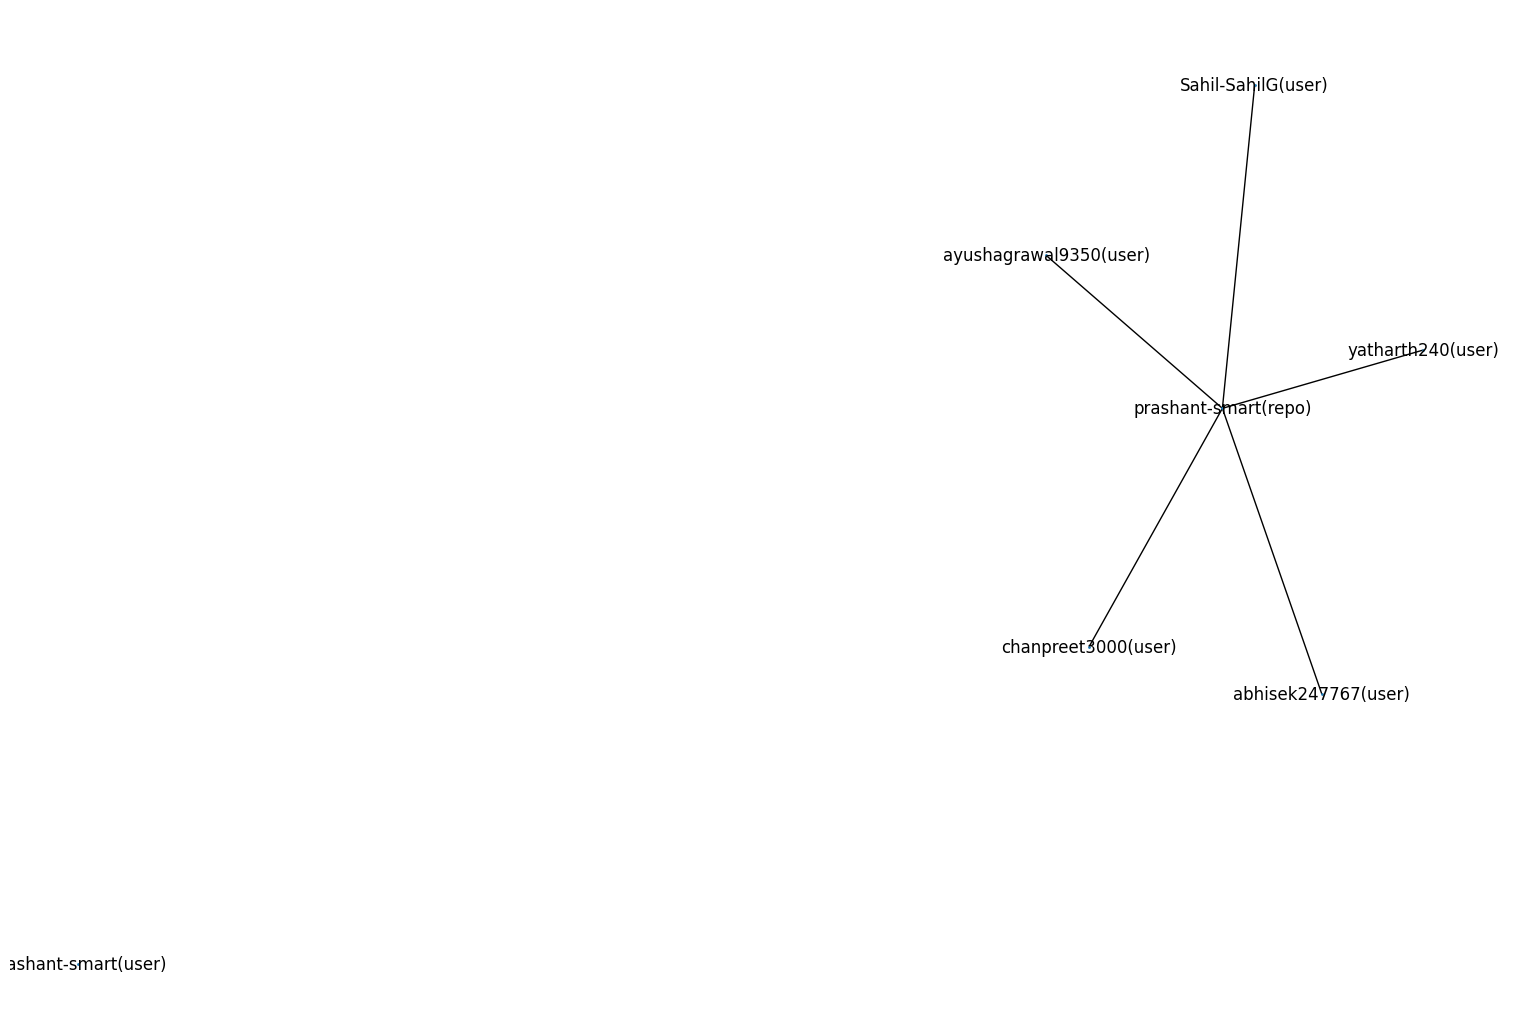

In [6]:
import networkx as nx

g_followers = nx.Graph()

g_followers.add_node(user.login + '(user)', type='user')

followers = [ s for s in user.get_followers() ]
print ("Number of followers", len(followers))
for follower in followers:
    g_followers.add_node(follower.login + '(user)', type='user')
    g_followers.add_edge(follower.login + '(user)', user.login + '(repo)', type='follows')
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(g_followers, with_labels=True, node_size=1)
plt.show()

# Adding Followers' followers

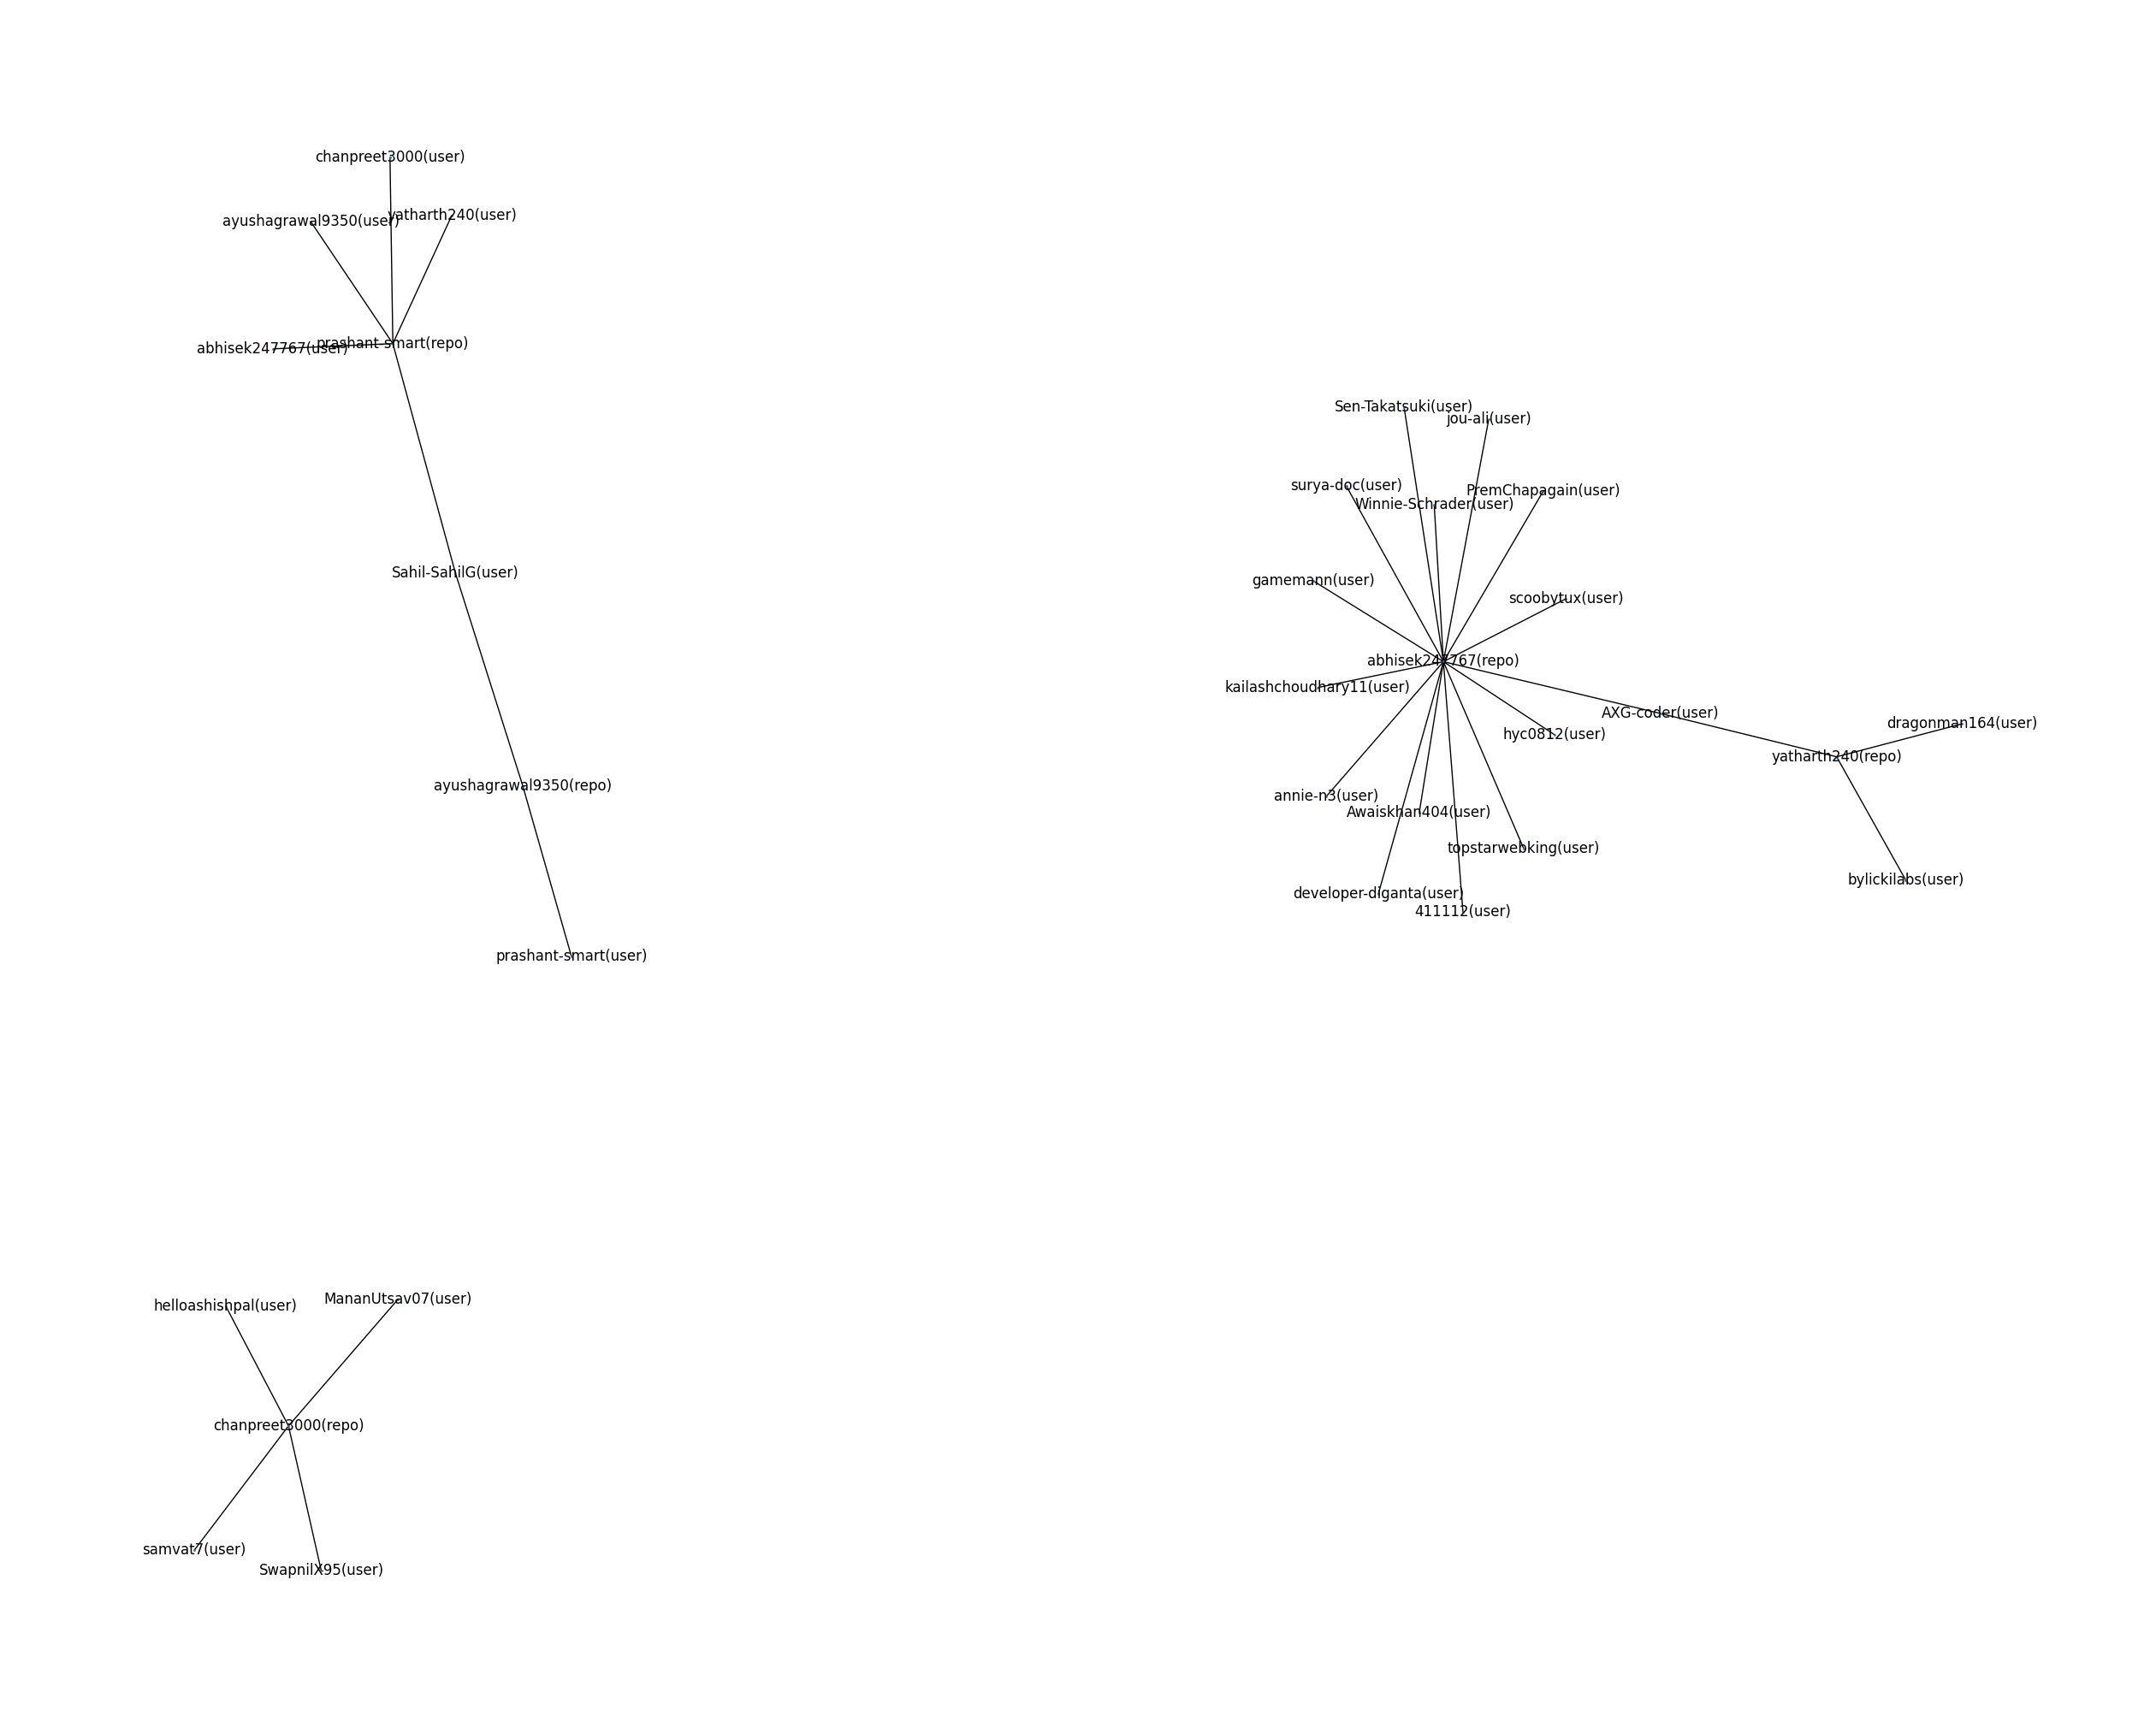

In [7]:
for follower in followers:
    followers_2 = [ s for s in follower.get_followers() ]
    for follower_2 in followers_2:
        g_followers.add_node(follower_2.login + '(user)', type='user')
        g_followers.add_edge(follower_2.login + '(user)', follower.login + '(repo)', type='follows')
%matplotlib inline
import matplotlib.pyplot as plt
#import networkx as nx
plt.figure(figsize=(25,20))
nx.draw(g_followers, with_labels=True, node_size=1)
plt.show()

In [8]:
print ("Number of Nodes :-",nx.number_of_nodes(g_followers))
print ("Number Of Edges :-",nx.number_of_edges(g_followers))
print ("Density :-",nx.density(g_followers))

Number of Nodes :- 32
Number Of Edges :- 29
Density :- 0.05846774193548387


# Who is central?

In [9]:
from operator import itemgetter
from IPython.display import HTML
from IPython.display import display

print ("Degree Centrality")
print (sorted(nx.degree_centrality(g_followers).items(),key=itemgetter(1), reverse=True)[:10])

print ("Betweenness Centrality")
print (sorted(nx.betweenness_centrality(g_followers).items(), key=itemgetter(1), reverse=True)[:10])

print ("Closeness Centrality")
print (sorted(nx.closeness_centrality(g_followers).items(), key=itemgetter(1), reverse=True)[:10])

Degree Centrality
[('abhisek247767(repo)', 0.4838709677419355), ('prashant-smart(repo)', 0.16129032258064516), ('chanpreet3000(repo)', 0.12903225806451613), ('yatharth240(repo)', 0.0967741935483871), ('Sahil-SahilG(user)', 0.06451612903225806), ('AXG-coder(user)', 0.06451612903225806), ('ayushagrawal9350(repo)', 0.06451612903225806), ('prashant-smart(user)', 0.03225806451612903), ('chanpreet3000(user)', 0.03225806451612903), ('abhisek247767(user)', 0.03225806451612903)]
Betweenness Centrality
[('abhisek247767(repo)', 0.3161290322580645), ('AXG-coder(user)', 0.0967741935483871), ('yatharth240(repo)', 0.07096774193548387), ('prashant-smart(repo)', 0.03870967741935484), ('Sahil-SahilG(user)', 0.021505376344086023), ('chanpreet3000(repo)', 0.012903225806451613), ('ayushagrawal9350(repo)', 0.012903225806451613), ('prashant-smart(user)', 0.0), ('chanpreet3000(user)', 0.0), ('abhisek247767(user)', 0.0)]
Closeness Centrality
[('abhisek247767(repo)', 0.45441795231416554), ('AXG-coder(user)', 0.

### PageRank

In [10]:
import operator
pr = nx.pagerank(g_followers)
sorted_x = sorted(pr.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_x[:10])

[('abhisek247767(repo)', 0.2272977453708442), ('prashant-smart(repo)', 0.08348716529121726), ('chanpreet3000(repo)', 0.07432337837565448), ('yatharth240(repo)', 0.050569146507428234), ('ayushagrawal9350(repo)', 0.036444005876322016), ('Sahil-SahilG(user)', 0.03436968726544124), ('AXG-coder(user)', 0.03189660253299601), ('helloashishpal(user)', 0.020481655406086374), ('MananUtsav07(user)', 0.020481655406086374), ('SwapnilX95(user)', 0.020481655406086374)]


### Hub and Authority Scores

In [11]:
hub, authority = nx.hits(g_followers)
sorted_hub = sorted(hub.items(), key=operator.itemgetter(1),reverse=True)
print("Most Influential Users based on Hub Score")
print(sorted_hub[:10])
print()
sorted_authority = sorted(authority.items(), key=operator.itemgetter(1),reverse=True)
print("Most Influential Users based on Authority Score")
print(sorted_authority[:10])

Most Influential Users based on Hub Score
[('AXG-coder(user)', 0.18174885849096611), ('gamemann(user)', 0.16785661990067938), ('PremChapagain(user)', 0.16785661990067938), ('Awaiskhan404(user)', 0.16785661990067938), ('Winnie-Schrader(user)', 0.16785661990067938), ('developer-diganta(user)', 0.16785661990067938), ('jou-ali(user)', 0.16785661990067938), ('Sen-Takatsuki(user)', 0.16785661990067938), ('surya-doc(user)', 0.16785661990067938), ('scoobytux(user)', 0.16785661990067938)]

Most Influential Users based on Authority Score
[('AXG-coder(user)', 0.08113589622006814), ('scoobytux(user)', 0.07493415587416137), ('gamemann(user)', 0.07493415587416136), ('Awaiskhan404(user)', 0.07493415587416136), ('Winnie-Schrader(user)', 0.07493415587416136), ('Sen-Takatsuki(user)', 0.07493415587416136), ('surya-doc(user)', 0.07493415587416136), ('topstarwebking(user)', 0.07493415587416136), ('PremChapagain(user)', 0.07493415587416134), ('developer-diganta(user)', 0.07493415587416134)]


# Detecting Communities

In [12]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools
comp = girvan_newman(g_followers) 
k = 5
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
print("Number of users in community")
i=1
for communities in limited:
    print("\nIteration",i,"\n\n")
    i+=1
    for c in communities:
        print(len(c))

Number of users in community

Iteration 1 


8
5
15
4

Iteration 2 


3
5
5
15
4


### Visulaize Communities

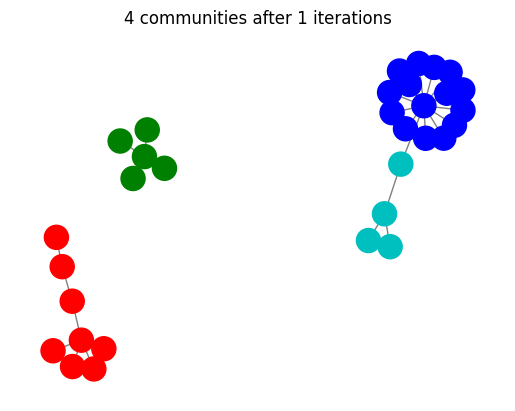

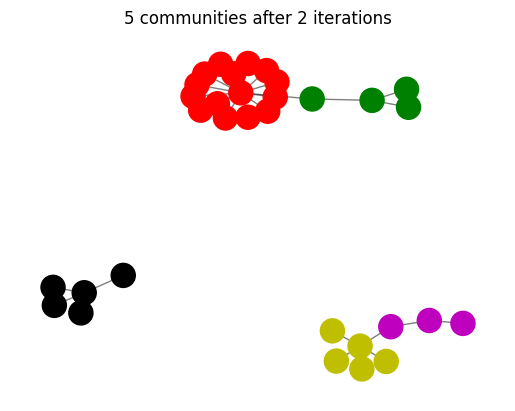

In [13]:
# compute the communities using the Girvan-Newman algorithm and visualize the changes after each iteration
communities_generator = girvan_newman(g_followers)
color_map = {node: 'b' for node in g_followers.nodes()}
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
k = 5
limited = itertools.takewhile(lambda c: len(c) <= k, communities_generator)
i = 0
count = 0
for communities in limited:
    #communities = next(communities_generator)
    pos = nx.spring_layout(g_followers)
    count += 1
    for c in communities:
        color = colors[i % len(colors)]
        for node in c:
            color_map[node] = color
        i += 1
    node_colors = [color_map[node] for node in g_followers.nodes()]
    nx.draw_networkx_nodes(g_followers, pos, node_color=node_colors)
    nx.draw_networkx_edges(g_followers, pos, alpha=0.5)
    plt.axis('off')
    plt.title(f"{len(communities)} communities after {count} iterations")
    plt.show()
    

### Recommend Users

In [14]:
import networkx as nx
from networkx.algorithms import community

followers = [ s for s in user.get_followers() ]
# Use Girvan-Newman algorithm to detect communities in the graph
comp = community.girvan_newman(g_followers)

# Get the top community
top_comp = tuple(sorted(c) for c in next(comp))

# Create a dictionary to store node and betweenness centrality values
betweenness_dict = nx.betweenness_centrality(g_followers)

# Sort the dictionary by values in descending order
sorted_betweenness = sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True)

# Create a list to store recommended users
recommendations = []

# Loop through the sorted dictionary
for user, betweenness in sorted_betweenness:
    if user not in top_comp[0] and user not in followers:
        recommendations.append(user)
    
# Print the recommended users
print("Users to follow: ", recommendations)


Users to follow:  ['abhisek247767(repo)', 'AXG-coder(user)', 'yatharth240(repo)', 'chanpreet3000(repo)', 'helloashishpal(user)', 'MananUtsav07(user)', 'SwapnilX95(user)', 'samvat7(user)', 'gamemann(user)', 'PremChapagain(user)', 'Awaiskhan404(user)', 'Winnie-Schrader(user)', 'developer-diganta(user)', 'jou-ali(user)', 'Sen-Takatsuki(user)', 'surya-doc(user)', 'scoobytux(user)', 'kailashchoudhary11(user)', 'hyc0812(user)', '411112(user)', 'topstarwebking(user)', 'annie-n3(user)', 'dragonman164(user)', 'bylickilabs(user)']
